In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
image_location = "../test_img/reverse.png"
img = cv2.imread(image_location , 0 )
image_name = "reverse.png"

In [3]:
plt.rcParams['figure.figsize'] = [10 , 10 ]

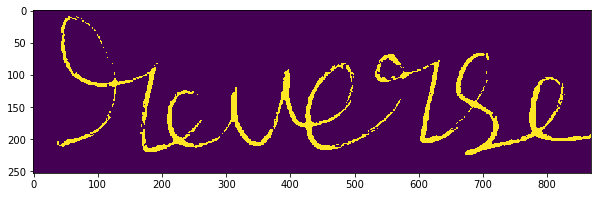

In [4]:
plt.imshow(img)
ret , thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh)
plt.show()

True

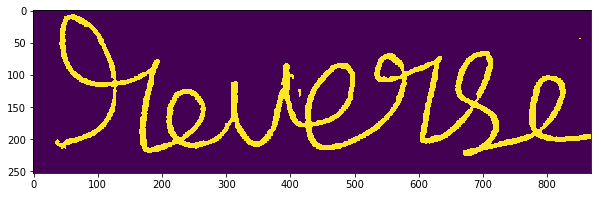

In [5]:
import numpy as np
import cv2
from imutils import resize
from imutils.contours import sort_contours
from skimage.morphology import skeletonize as skl

# path = 'test_img/cat.png'
# path = "test_img/place.png"
# path = "test_img/cts.png"
path = "../test_img/"+image_name
# path = 'test_img/reverse.png'
img = cv2.imread(path, 0)
img = cv2.GaussianBlur(img, (3, 3), 3)
th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                           cv2.THRESH_BINARY, 35, 11)
th = cv2.bitwise_not(th)
kernel = np.array([[0, 1, 1],
                  [0, 1, 0],
                  [1, 1, 0]], dtype='uint8')
th = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel)
plt.imshow(th)
th = th == 255
th = skl(th)
th = th.astype(np.uint8)*255
cv2.imwrite("../res/l_"+image_name+".png",th)# Stack the original and modified



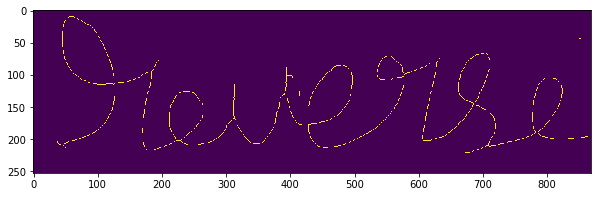

In [6]:
plt.imshow(th)

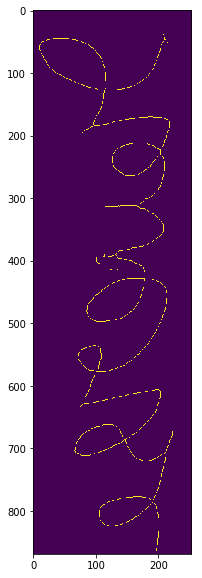

In [7]:
copy_of_th = th.copy()
transp = np.transpose(copy_of_th)
plt.imshow(transp)

In [8]:
line_img = transp.copy()

In [9]:
max_ = []
sum_ = []
line_points = []
mx = 4*255
for i , val  in enumerate(transp):
    if(sum(val) > mx ):
        temp = []
        for itr , tff in enumerate(val):
            if(tff>0):
                temp.append(itr)
        if(0 not in val[temp[0]+1:temp[-1]-1]):
            max_.append(i)
            sum_.append(sum(val))

for mx , sm in zip(max_,sum_):
#     if(sm>(4*255)):
    print ( mx , sm )
    line_points.append(mx)
#     line_img[mx] = [255] * len(line_img[mx])

# # segrregation of sp using size 
# temp = []
# occ_of_u_v_w = []
# flag= 0 
# for itr in range(len(line_points) - 1):
#     pnt1 = line_points[itr] 
#     pnt2 = line_points[itr+1]
#     for val in range(pnt1 , pnt2):
#         if(sum(transp[val]) == 255):
#             for i , ctr in enumerate(transp[val]) : 
#                 if (ctr == 255):
#                     temp.append(i)
#             for item in range(len(temp)):
#                 if()
                    

127 7650
317 1785
377 1785
379 2040
383 1785
384 1530
428 7650


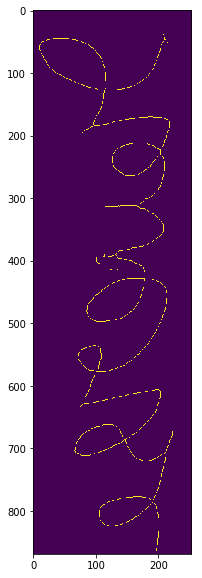

In [10]:
occ_of_u_v_w = []
plt.imshow((line_img))

In [11]:
# Calculate up and downs 
up = []
down= [] 

for val in transp:
    temp = []
    for i , value in enumerate(val):
        if(value>0):
            temp.append(i)
    try:
        if(len(temp) >= 2):
            up.append(temp[0])
            down.append(temp[-1])
        else:
            up.append(temp[0])
            down.append(" ")
    except : 
        pass
    

In [12]:
for u , d in zip(up,down):
    print (u , d)

204 206
207  
208  
208  
208  
209  
209  
32 209
27 210
22 210
20 211
17 212
15 213
13 214
12 205
12 205
12 204
11 204
10 203
10 203
10 203
10 203
10 202
10 202
10 202
10 202
11 202
11 202
12 201
12 201
13 201
13 200
14 200
14 199
15 199
15 199
16 198
16 198
17 198
17 197
18 197
18 197
19 196
20 196
21 195
21 195
22 194
22 194
22 194
23 193
24 193
24 192
25 192
26 192
27 191
28 191
29 190
30 190
32 189
33 188
34 187
35 187
37 186
38 185
40 185
42 184
44 183
46 182
48 181
50 180
51 179
53 178
56 177
58 176
60 174
62 173
65 171
67 170
69 168
71 166
73 164
76 162
79 161
82 159
84 156
88 154
93 149
98 146
102 140
103 132
113  
113  
113  
113  
112  
112  
112  
112  
112  
112  
112  
112  
112  
112  
111  
111  
111  
111  
110  
110  
110  
110  
109  
109  
109  
108  
108  
108  
107  
107  
107  
106  
106  
105  
105  
104  
104  
104  
103  
102  
101  
101  
100 190
100 204
99 208
99 211
98 214
98 215
97 216
97 216
97 217
96 217
96 217
96 217
96 217
95 217
95 217
95 217
93 217


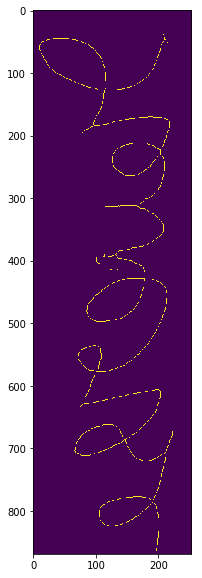

In [13]:
copy_of_transp = transp.copy()
plt.imshow(copy_of_transp)

In [14]:
# Calculating up avg , median , down avg 
sum_of_up = 0 
sum_of_down = 0 
count = 0 
for u , d in zip(up,down):
    if(d != " "):
        sum_of_up += u
        sum_of_down += d
        count += 1

In [15]:

sum_of_up

44590

In [16]:
count

470

In [17]:
avg_up = sum_of_up // count 

In [18]:
avg_down = sum_of_down // count 

In [19]:
print (avg_down , avg_up )
median = (avg_down + avg_up)// 2 
print ( "Median : ", median )

193 94
Median :  143


In [20]:
# new atempt 
avg_up = ( avg_up + median ) // 2 
avg_down = ( avg_down + median ) // 2 

In [21]:
test = np.transpose(copy_of_transp)
ln = len(test[0])
test[avg_down] = [255] * ln 
test[avg_up] = [255] * ln 
test[median] = [255] * ln 

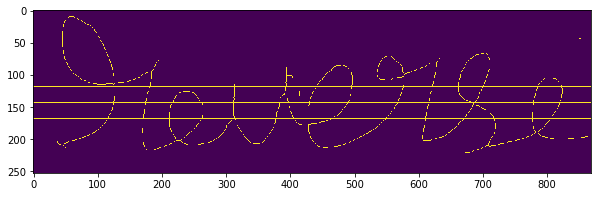

In [22]:
plt.imshow(test)

In [23]:
cv2.imwrite("test_rat_campus.png",test)

True

In [24]:
possible_sp = [u for u , d in zip(up,down) if(d == " ")]

In [25]:
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

In [26]:
sp_list = [] # Segmentation Points
for i , val in enumerate(transp):
    if (sum(val[median:]) == 255 and sum(val) == 255):
        sp_list.append(i)

In [27]:
# for val in n_consec_sp:
#     print (val)

In [28]:
consec_sp = consecutive(sp_list)
merge_arr = [0]
# consec_sp = np.to_list(consec_sp)
n_consec_sp  = []
for itr , val in enumerate(consec_sp):
    if (len(val) > 2):
        print ("XXX",consec_sp[itr])
        n_consec_sp.append(val)
print (len(n_consec_sp))
for val in n_consec_sp:
    print (val)
before = 0 
for i in range(1,len(n_consec_sp)):
    print(i)
#     try:
    if(n_consec_sp[i][0]-n_consec_sp[i-1][-1] <= 7):
        merge_arr.append(1)
    else:
        merge_arr.append(0)
#             n_consec_sp.pop(i)
#     except:
#         pass
        

XXX [39 40 41 42 43 44]
XXX [197 198 199 200 201 202 203 204 205 206 207 208 209 210 211]
XXX [265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282
 283 284 285 286 287 288 289 290 291 292 293 294 295]
XXX [302 303 304 305 306]
XXX [308 309 310 311]
XXX [314 315 316]
XXX [326 327 328]
XXX [330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 355 356 357 358 359 360]
XXX [362 363 364 365 366]
XXX [409 410 411 412 413]
XXX [416 417 418 419 420 421 422 423 424 425 426 427]
XXX [498 499 500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515
 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533
 534]
XXX [635 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652
 653 654 655 656 657 658 659 660 661]
XXX [721 722 723 724 725 726 727 728 729 730 731 732 733 734 735 736 737 738
 739 740 741 742 743 744 745 746 747 748 749 750 751 752 753 754 755 756
 757 758 759 760 761 762 763 764 765 

In [29]:
res_consec_sp = [[] for _ in range(len(n_consec_sp))]
for i ,j in zip(merge_arr , n_consec_sp):
    print ( i , j)
count = 0
itr = 2
# while(itr!=0):
for i , val in enumerate(merge_arr):
    temp = []
    if ( val == 0 ):
        temp = (n_consec_sp[i].tolist())
#         print ( temp)
        res_consec_sp[count].extend(temp)
        print(temp)
#         print ( count , res_consec_sp[count])
#         print ( "sdfasdf")
        count += 1
    else:
#         count -= 1
        temp = (n_consec_sp[i].tolist())
        res_consec_sp[count-1].extend(temp)
        print ( i , val , count-1)
#         itr -= 1 
#         count+=1 
#     break
# print ( res_consec_sp[count])
        
    

0 [39 40 41 42 43 44]
0 [197 198 199 200 201 202 203 204 205 206 207 208 209 210 211]
0 [265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282
 283 284 285 286 287 288 289 290 291 292 293 294 295]
1 [302 303 304 305 306]
1 [308 309 310 311]
1 [314 315 316]
0 [326 327 328]
1 [330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 355 356 357 358 359 360]
1 [362 363 364 365 366]
0 [409 410 411 412 413]
1 [416 417 418 419 420 421 422 423 424 425 426 427]
0 [498 499 500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515
 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533
 534]
0 [635 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652
 653 654 655 656 657 658 659 660 661]
0 [721 722 723 724 725 726 727 728 729 730 731 732 733 734 735 736 737 738
 739 740 741 742 743 744 745 746 747 748 749 750 751 752 753 754 755 756
 757 758 759 760 761 762 763 764 765 766 767 768 769 770 771 772 

In [30]:
for val in res_consec_sp:
    print (val)

[39, 40, 41, 42, 43, 44]
[197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211]
[265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 302, 303, 304, 305, 306, 308, 309, 310, 311, 314, 315, 316]
[326, 327, 328, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 362, 363, 364, 365, 366]
[409, 410, 411, 412, 413, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427]
[498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661]
[721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736

In [31]:

for val , d  in zip(merge_arr,n_consec_sp):
    print(val,d)

0 [39 40 41 42 43 44]
0 [197 198 199 200 201 202 203 204 205 206 207 208 209 210 211]
0 [265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282
 283 284 285 286 287 288 289 290 291 292 293 294 295]
1 [302 303 304 305 306]
1 [308 309 310 311]
1 [314 315 316]
0 [326 327 328]
1 [330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 355 356 357 358 359 360]
1 [362 363 364 365 366]
0 [409 410 411 412 413]
1 [416 417 418 419 420 421 422 423 424 425 426 427]
0 [498 499 500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515
 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533
 534]
0 [635 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652
 653 654 655 656 657 658 659 660 661]
0 [721 722 723 724 725 726 727 728 729 730 731 732 733 734 735 736 737 738
 739 740 741 742 743 744 745 746 747 748 749 750 751 752 753 754 755 756
 757 758 759 760 761 762 763 764 765 766 767 768 769 770 771 772 

In [32]:
# strt  , end = 0 

for itr in range(len(line_points)-1):
    count = 0
    for i , val in enumerate(res_consec_sp):
        if ( len ( val ) > 7 ) : 
#         print (i , val[0] , val[-1])
            if(line_points[itr]<val[0] and line_points[itr+1]>val[-1]):
                count += 1
                print (line_points[itr] , line_points[itr+1]  , i , val[0] , val[-1] )
                strt = val[0]
                end = val[-1]
                index = i
    if(count == 1):
        if(end-strt >= 25):
            res_consec_sp.pop(index)
print (res_consec_sp)
        
        

127 317 1 197 211
127 317 2 265 316
317 377 3 326 366
384 428 3 409 427
[[39, 40, 41, 42, 43, 44], [197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211], [265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 302, 303, 304, 305, 306, 308, 309, 310, 311, 314, 315, 316], [409, 410, 411, 412, 413, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427], [498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534], [635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661], [721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 

In [33]:
for val in res_consec_sp:
    print(val)

[39, 40, 41, 42, 43, 44]
[197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211]
[265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 302, 303, 304, 305, 306, 308, 309, 310, 311, 314, 315, 316]
[409, 410, 411, 412, 413, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427]
[498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
[635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661]
[721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775,

In [34]:
for val in line_points:
    print (val)

127
317
377
379
383
384
428


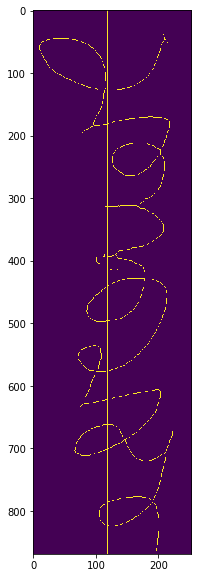

In [35]:
plt.imshow(np.transpose(test))

In [36]:
for val in consec_sp:
    print (val)

[39 40 41 42 43 44]
[197 198 199 200 201 202 203 204 205 206 207 208 209 210 211]
[265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282
 283 284 285 286 287 288 289 290 291 292 293 294 295]
[297]
[299]
[302 303 304 305 306]
[308 309 310 311]
[314 315 316]
[319]
[323]
[326 327 328]
[330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 355 356 357 358 359 360]
[362 363 364 365 366]
[369]
[371]
[407]
[409 410 411 412 413]
[416 417 418 419 420 421 422 423 424 425 426 427]
[498 499 500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515
 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533
 534]
[635 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652
 653 654 655 656 657 658 659 660 661]
[721 722 723 724 725 726 727 728 729 730 731 732 733 734 735 736 737 738
 739 740 741 742 743 744 745 746 747 748 749 750 751 752 753 754 755 756
 757 758 759 760 761 762 763 764 765 766 767 768 76

In [37]:
new = np.transpose(test)
ln = len(new[0])

In [38]:

for val in res_consec_sp:
    if ( len ( val ) > 2 ) : 
        avg = sum(val) // len(val)
        new[avg] = [255] * ln

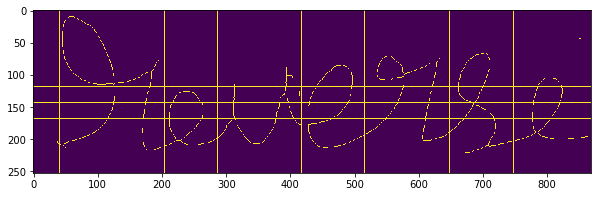

In [39]:
plt.imshow(np.transpose(new))

In [40]:
cv2.imwrite("new_campus.png",np.transpose(new))

True